<a href="https://colab.research.google.com/github/warrenshiv/CalCOFI_Data_Analysis/blob/main/Ass_Part2_Task3_Linear_Regression_FirstNameLastName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Name:
# Last Name:

# Import Libraries  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

# Import Data

In [2]:
df = pd.read_csv(r'/content/bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x: '%f' % x)

# Data management

In [3]:
# Select the variables T_degC (Temperature) and Salnty (Salinity)
df = df.dropna(subset=['T_degC', 'Salnty'])
X = df['Salnty']
y = df['T_degC']

# Linear Regression

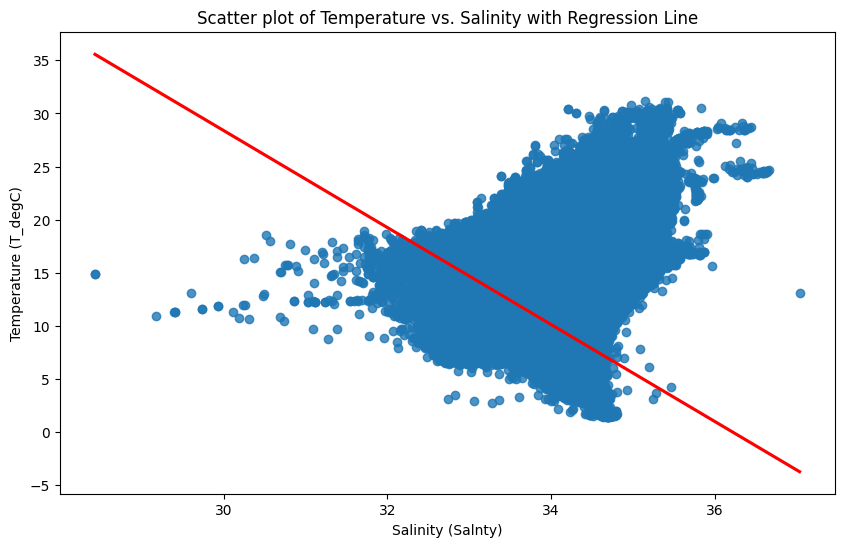

In [4]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, line_kws={"color": "red"})
plt.xlabel('Salinity (Salnty)')
plt.ylabel('Temperature (T_degC)')
plt.title('Scatter plot of Temperature vs. Salinity with Regression Line')
plt.show()

In [5]:
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [6]:
# Regression Analysis results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                 2.636e+05
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:23:46   Log-Likelihood:            -2.1612e+06
No. Observations:              795521   AIC:                         4.322e+06
Df Residuals:                  795519   BIC:                         4.322e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        165.3740      0.301    549.421      0.0

In [7]:
# Regression line
print(f'Regression line: Y = {model.params[0]:.2f} + {model.params[1]:.2f}X')

Regression line: Y = 165.37 + -4.57X


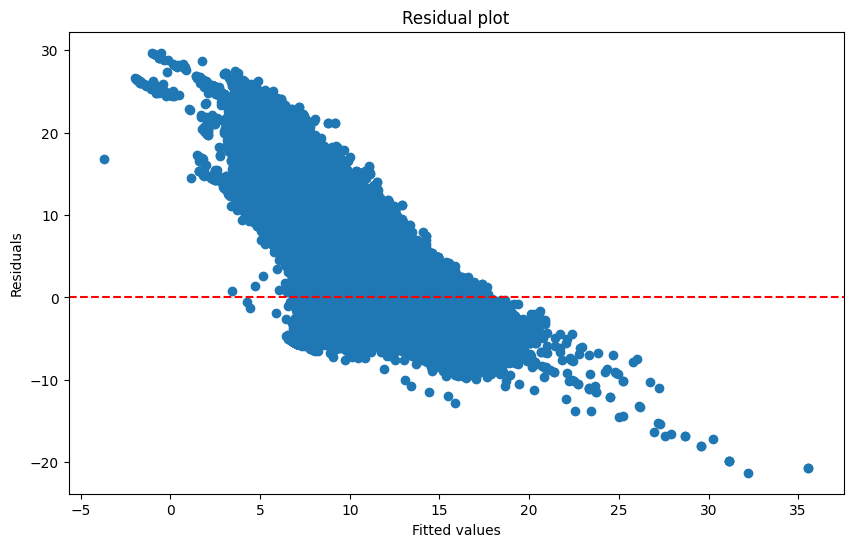

In [8]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()